1) the dataset source link : https://www.kaggle.com/datasets/mirichoi0218/insurance                                         
it's a dataset wich contains Medical Cost Personal Insurance for beneficiaries, This dataset consists of 1338 rows and 7 columns.
we choosed this dataset because it represents a real and important problem for predicting healthcare cost and the data is well-structured.

2. Loading the dataset using Pandas

In [3]:

import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

In [4]:
insurance_df = pd.read_csv("insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Some basic data profiling (statistics about the data, distributions, missing values, etc.) using Pandas methods.

In [5]:
insurance_df.shape

(1338, 7)

In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
print("         Number of Missing Values per Column")
print(insurance_df.isnull().sum())

         Number of Missing Values per Column
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


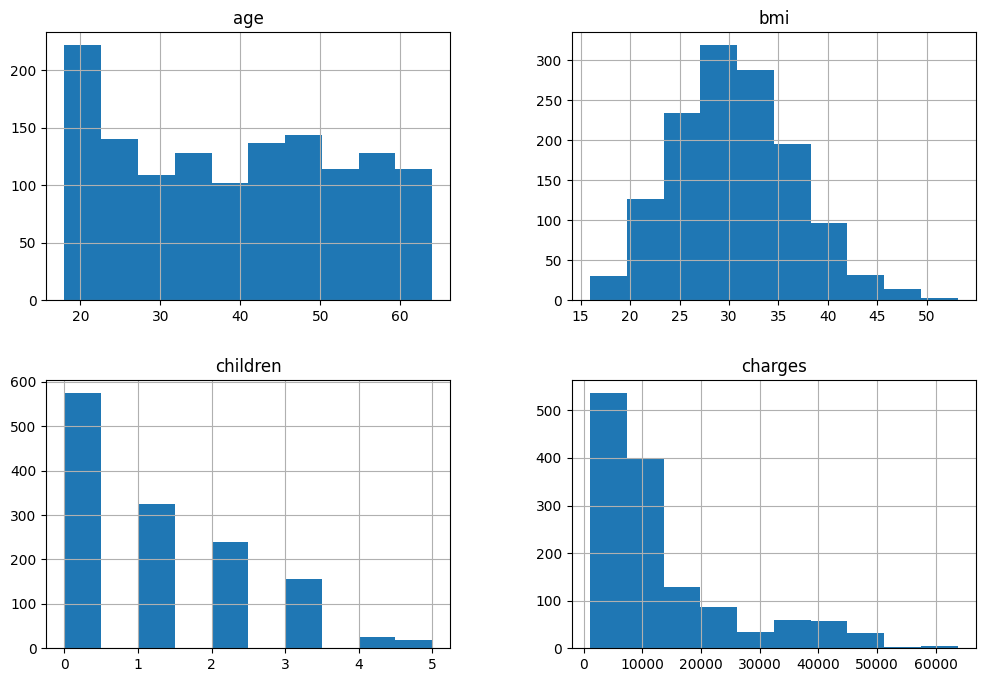

In [24]:
import matplotlib.pyplot as plt


insurance_df.hist(figsize=(12,8))

plt.show()

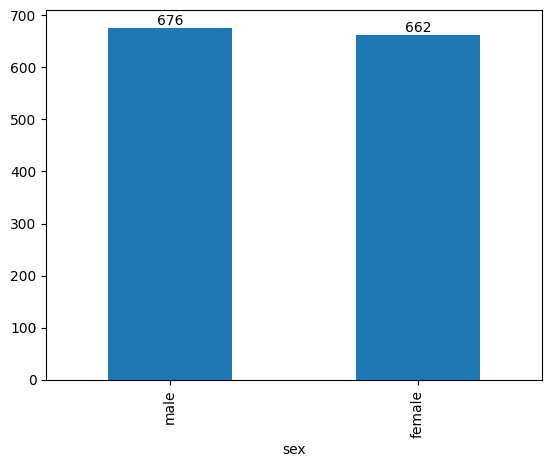

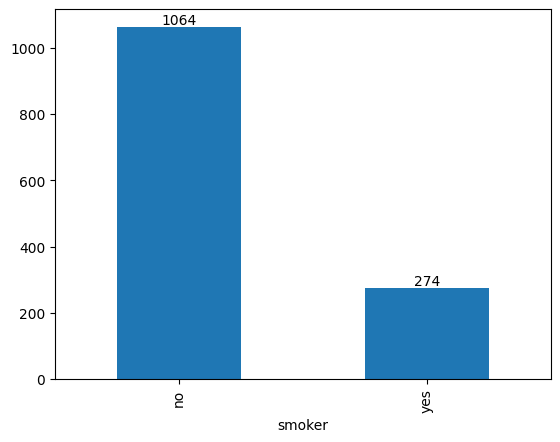

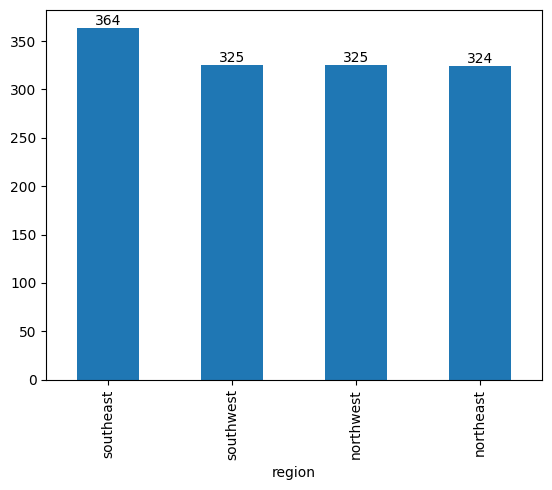

In [25]:
import matplotlib.pyplot as plt
qualitative_var = ["sex", "smoker","region"]

for col in qualitative_var:
    
    ax = insurance_df[col].value_counts().plot(kind="bar")
    ax.bar_label(ax.containers[0])
    plt.show()

4. Creating 2 new useful or interesting columns based on other existing columns 

A new column called *insurance_risk_level* was created by combining age, BMI, and smoking status. Individuals were classified into low, medium, or high risk groups based on commonly accepted health risk factors. Smoking, obesity, and older age were treated as high-risk indicators, while younger non-smokers with normal BMI were considered low risk. This derived feature helps simplify complex health information into a single, interpretable variable for analysis.

In [9]:
# Insurance risk based on BMI, Smoker and age
insurance_df['insurance_risk_level'] = ''

for i in range(len(insurance_df)):
    
    age = insurance_df.loc[i, 'age']
    bmi = insurance_df.loc[i, 'bmi']
    smoker = insurance_df.loc[i, 'smoker']
    
    if smoker == 'yes' or bmi >= 30 or age >= 50:
        insurance_df.loc[i, 'insurance_risk_level'] = 'High'
    
    elif age >= 35 or bmi >= 25:
        insurance_df.loc[i, 'insurance_risk_level'] = 'Medium'
    
    else:
        insurance_df.loc[i, 'insurance_risk_level'] = 'Low'
insurance_df[['age','sex','bmi','children','smoker','region','charges','insurance_risk_level']].head()

,age,sex,bmi,children,smoker,region,charges,insurance_risk_level
0,19,female,27.900,0,yes,southwest,16884.92400,High
1,18,male,33.770,1,no,southeast,1725.55230,High
2,28,male,33.000,3,no,southeast,4449.46200,High
3,33,male,22.705,0,no,northwest,21984.47061,Low
4,32,male,28.880,0,no,northwest,3866.85520,Medium


A new column called *charges_per_child* was created to estimate how insurance charges scale with family size. For individuals with one or more children, the total insurance charges were divided by the number of children. For individuals with no children, the original insurance charge was retained. This feature provides insight into how insurance costs relate to dependents.

In [11]:


for i in range(len(insurance_df)):
    
    charges = insurance_df.loc[i, 'charges']
    children = insurance_df.loc[i, 'children']
    
    if children > 0:
        insurance_df.loc[i, 'charges_per_child'] = charges / children
    else:
        insurance_df.loc[i, 'charges_per_child'] = charges

insurance_df.head()


,age,sex,bmi,children,smoker,region,charges,charges_per_child,insurance_risk_level
0,19,female,27.900,0,yes,southwest,16884.92400,16884.92400,High
1,18,male,33.770,1,no,southeast,1725.55230,1725.55230,High
2,28,male,33.000,3,no,southeast,4449.46200,1483.15400,High
3,33,male,22.705,0,no,northwest,21984.47061,21984.47061,Low
4,32,male,28.880,0,no,northwest,3866.85520,3866.85520,Medium


5. Make 3 interesting observations about the data based on your analysis, using Pandas queries and Matplotlib visualizations

1. Distribution of Charges by Smoking Status

    The pie chart illustrates how total insurance charges are distributed between smokers and non-smokers. It is clear that smokers contribute a disproportionately high share of total charges compared to non-smokers. On average, smokers pay more than double the insurance charges of non-smokers, emphasizing that smoking is a key determinant of higher healthcare costs.


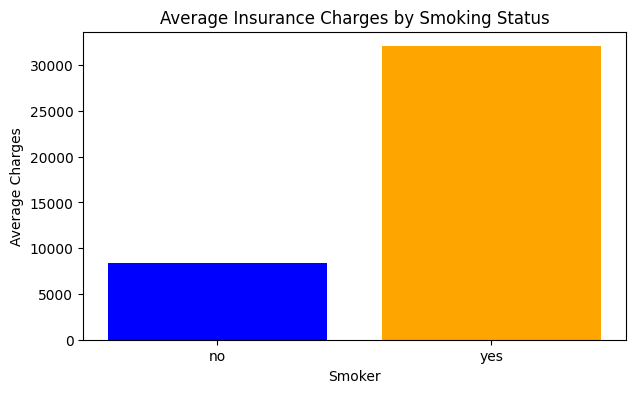

In [12]:
smoker_charges = insurance_df.groupby('smoker')['charges'].mean().reset_index()
plt.figure(figsize=(7, 4))
plt.bar(smoker_charges['smoker'], smoker_charges['charges'], color=['blue', 'orange'])
plt.title('Average Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()

2. Average Insurance Charges by Age Group

    The pie chart shows the average insurance charges across different age groups. We can see that insurance costs generally increase with age. Younger individuals (<25) tend to have lower charges, while older age groups (45–55 and 55+) have significantly higher charges. This trend highlights that age is a strong factor in insurance pricing, reflecting increased health risks as people get older.



C:\Users\HP\AppData\Local\Temp\ipykernel_25448\1141839650.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_charges = insurance_df.groupby('age_group')['charges'].sum()


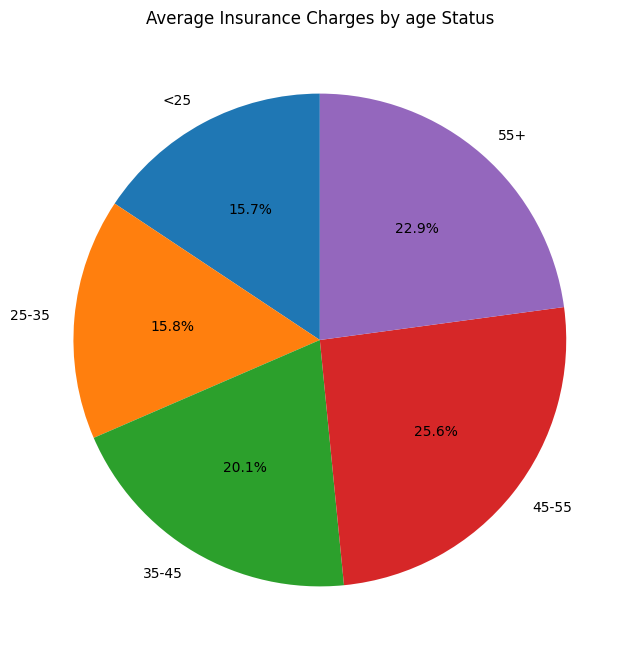

In [14]:
# Average Insurance Charges by age Status
insurance_df['age_group'] = pd.cut(
    insurance_df['age'],
    bins=[0, 25, 35, 45, 55, 100],
    labels=['<25', '25-35', '35-45', '45-55', '55+']
)
age_charges = insurance_df.groupby('age_group')['charges'].sum()

plt.figure(figsize=(8, 8))
plt.title('Average Insurance Charges by age Status')

plt.pie(
    age_charges,
    labels=age_charges.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.show()

3. Average Insurance Charges by BMI Category and Smoking Status

    The bar chart compares average insurance charges across BMI categories for smokers and non-smokers. Charges increase with BMI for both groups, but smokers consistently have higher charges than non-smokers in all categories. The difference becomes especially pronounced in the Overweight and Obese categories, showing that smoking amplifies the financial impact of higher BMI on insurance costs.

C:\Users\HP\AppData\Local\Temp\ipykernel_25448\3614730553.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insurance_df.groupby(['bmi_category', 'smoker'])['charges']


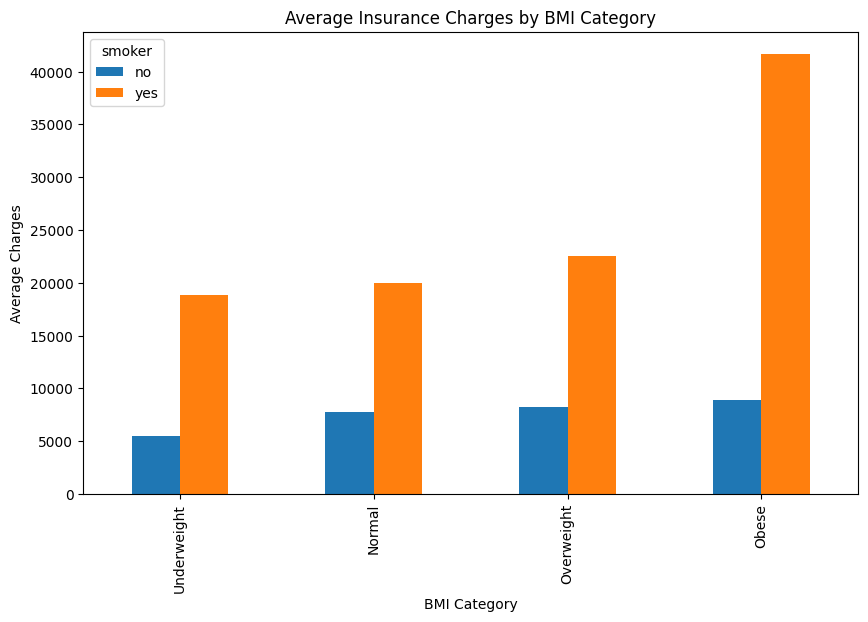

In [17]:
# Avarage Insurance Charges by BMI and Smoker
insurance_df['bmi_category'] = pd.cut(
    insurance_df['bmi'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
bmi_charges = (
    insurance_df.groupby(['bmi_category', 'smoker'])['charges']
    .mean()
    .reset_index()
)
pivot_df = bmi_charges.pivot(
    index='bmi_category',
    columns='smoker',
    values='charges'
)

pivot_df.plot(kind='bar', figsize=(10,6))
plt.title('Average Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.show()

6. Exporting the modified dataset to a new CSV file

In [19]:
insurance_df.to_csv("calculated_medical_costs.csv", index=False)

In [20]:
final_csv=pd.read_csv("calculated_medical_costs.csv")
final_csv

,age,sex,bmi,children,smoker,region,charges,charges_per_child,insurance_risk_level,age_group,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,16884.92400,High,<25,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,1725.55230,High,<25,Obese
2,28,male,33.000,3,no,southeast,4449.46200,1483.15400,High,25-35,Obese
3,33,male,22.705,0,no,northwest,21984.47061,21984.47061,Low,25-35,Normal
4,32,male,28.880,0,no,northwest,3866.85520,3866.85520,Medium,25-35,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3533.51610,High,45-55,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,2205.98080,High,<25,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,1629.83350,High,<25,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,2007.94500,Medium,<25,Overweight
